<a href="https://colab.research.google.com/github/kondapalliDeepa/FMML-PROJECT1/blob/main/Copy_of_FMML_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

```
Coordinator: Aswin Jose
```

---

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


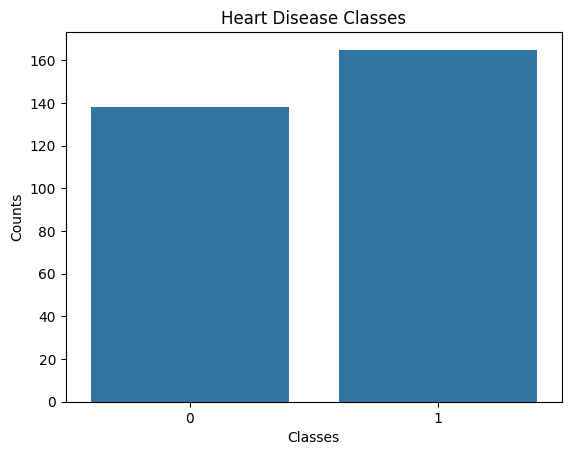

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/My Drive/Copy of heart.csv')
print(data.head())
sns.barplot(x=data['target'].value_counts().index, y=data['target'].value_counts().values)

plt.title('Heart Disease Classes')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()















Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1      

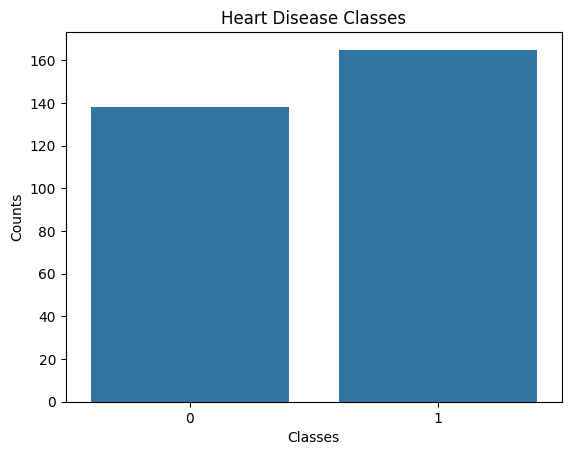

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Copy of heart.csv')
print(data.head())
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/Copy of heart.csv')
print(data.head())
sns.barplot(x=data['target'].value_counts().index, y=data['target'].value_counts().values)

plt.title('Heart Disease Classes')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()



In [ ]:
data.shape

(303, 14)

In [ ]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [ ]:

data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease


First, lets look at the difference in the number of samples with and without disease using a barplot.

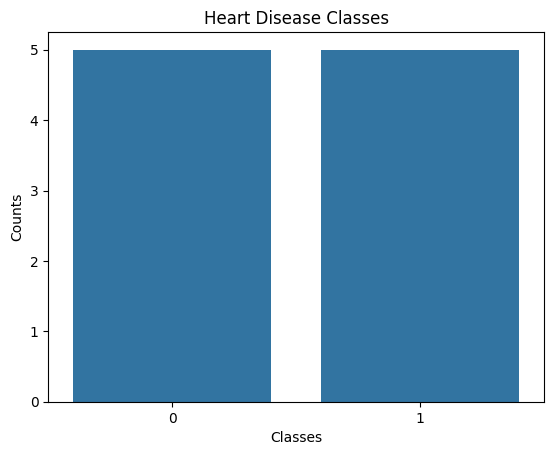

/content


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.DataFrame({
    'target': [0, 1, 0, 1, 1, 0, 1, 0, 0, 1]
})
sns.barplot(x=data['target'].value_counts().index, y=data['target'].value_counts().values)

plt.title('Heart Disease Classes')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()
import pandas as pd
data = {
    'target': [0, 1, 0, 1, 1, 0, 1, 0, 0, 1]
}
df = pd.DataFrame(data)
df.to_csv('heart_disease_data.csv', index=False)
import os
print(os.getcwd())




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


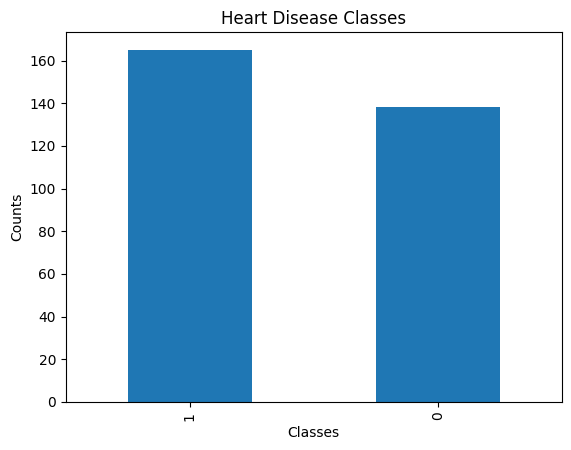

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import os
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Copy of heart.csv'
try:
    data = pd.read_csv(file_path)
    print(data.columns)
    print(data.head())
    if 'target' in data.columns:
        data['target'].value_counts().plot(kind='bar')
        plt.title('Heart Disease Classes')
        plt.xlabel('Classes')
        plt.ylabel('Counts')
        plt.show()
    else:
        print("The 'target' column does not exist in the DataFrame.")

except FileNotFoundError:
    print(f"File not found at: {file_path}")


In [ ]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
## to do

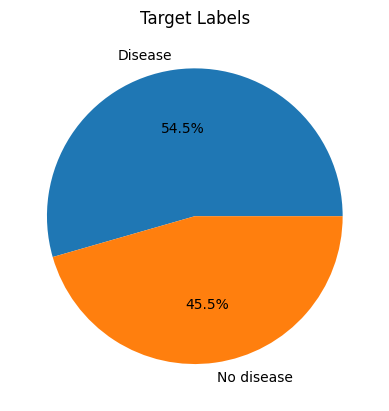

In [ ]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

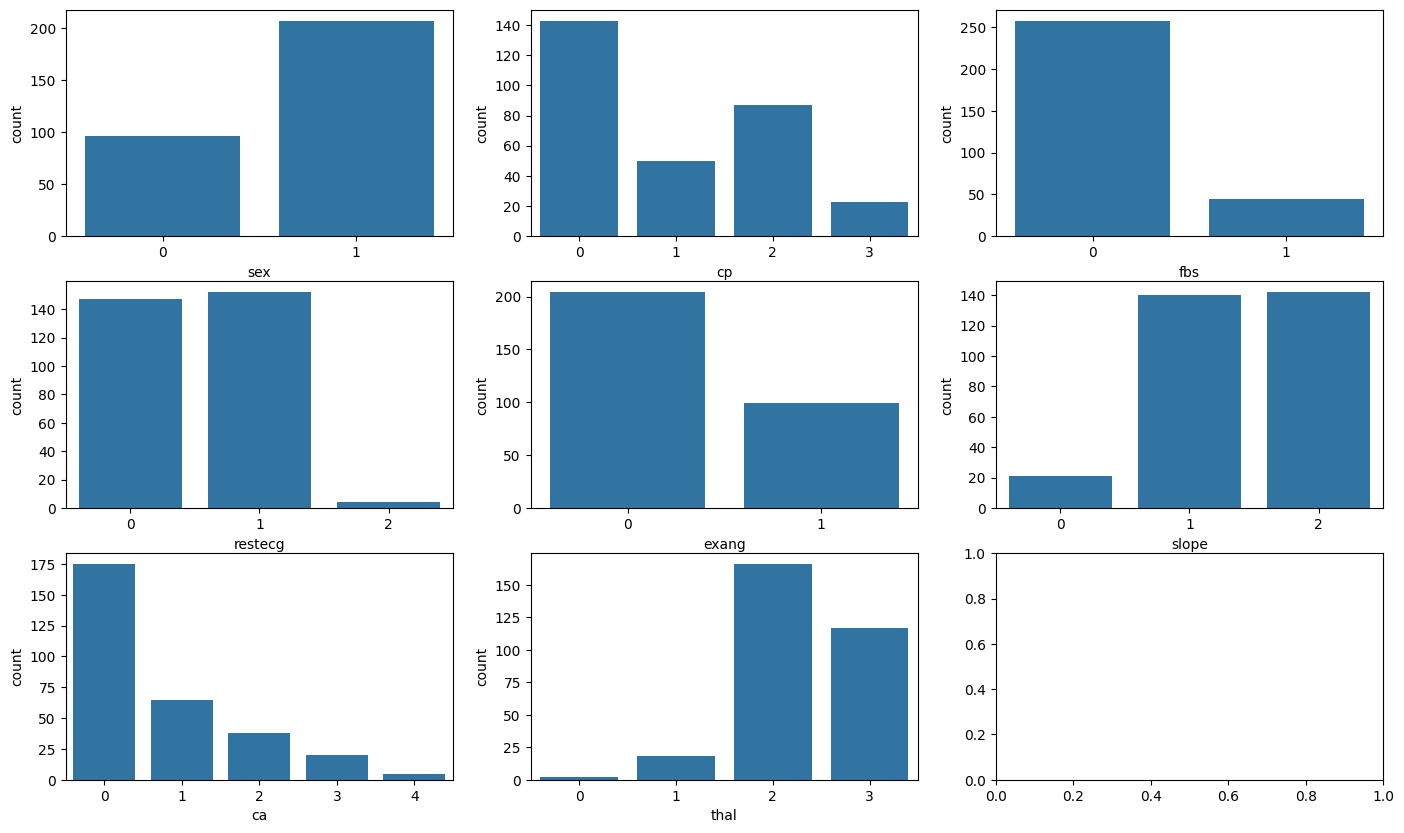

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

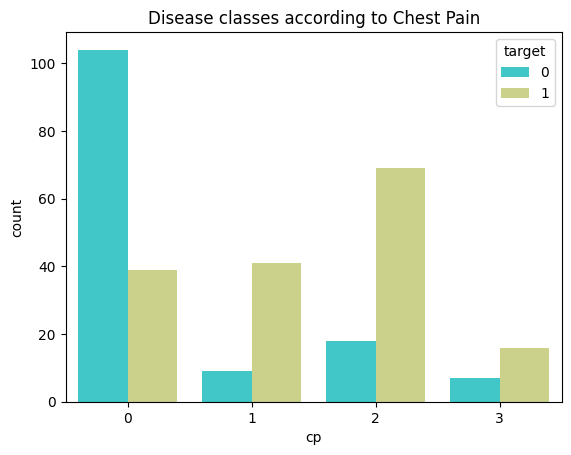

In [ ]:
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

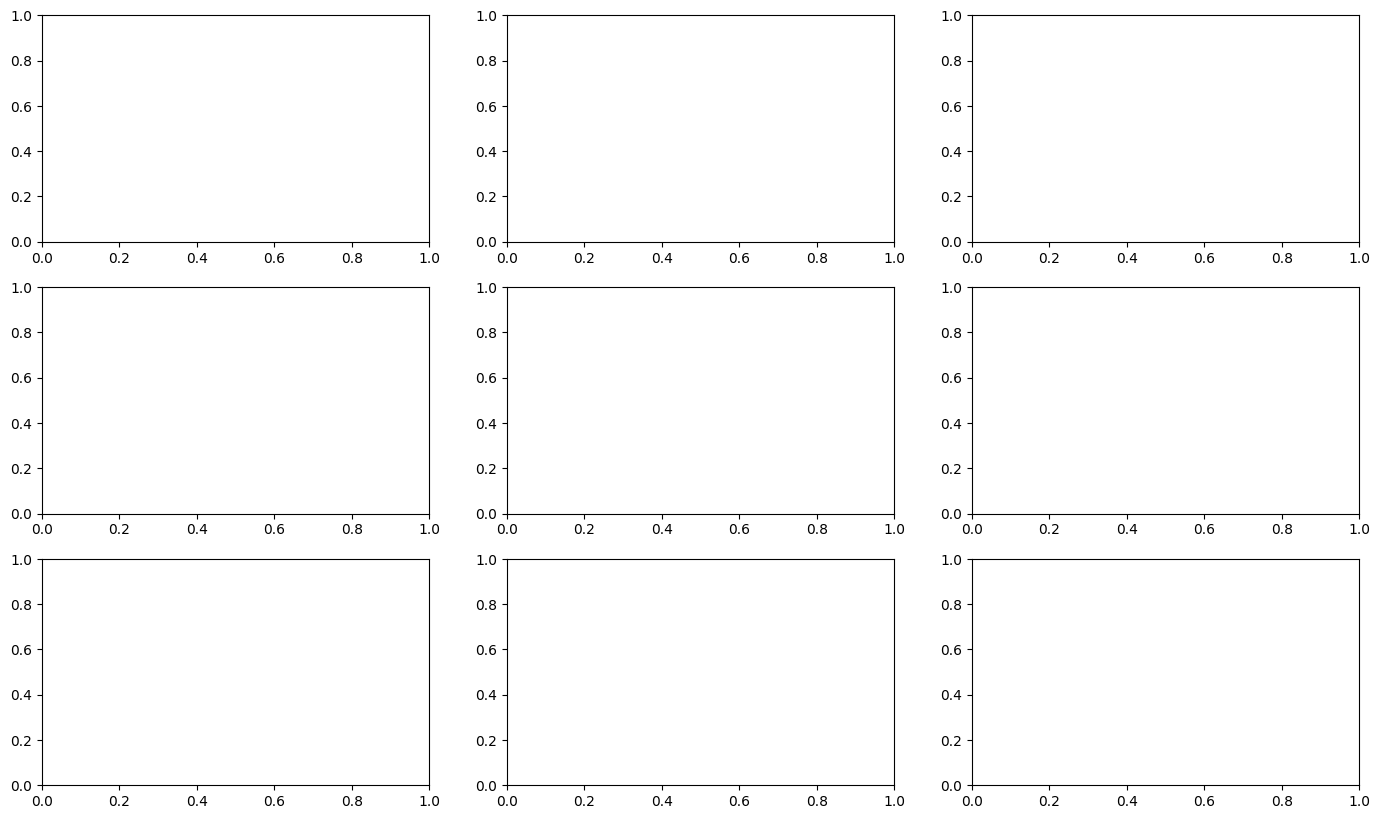

In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]


In [ ]:
# Visualising the distribution of the continous variables

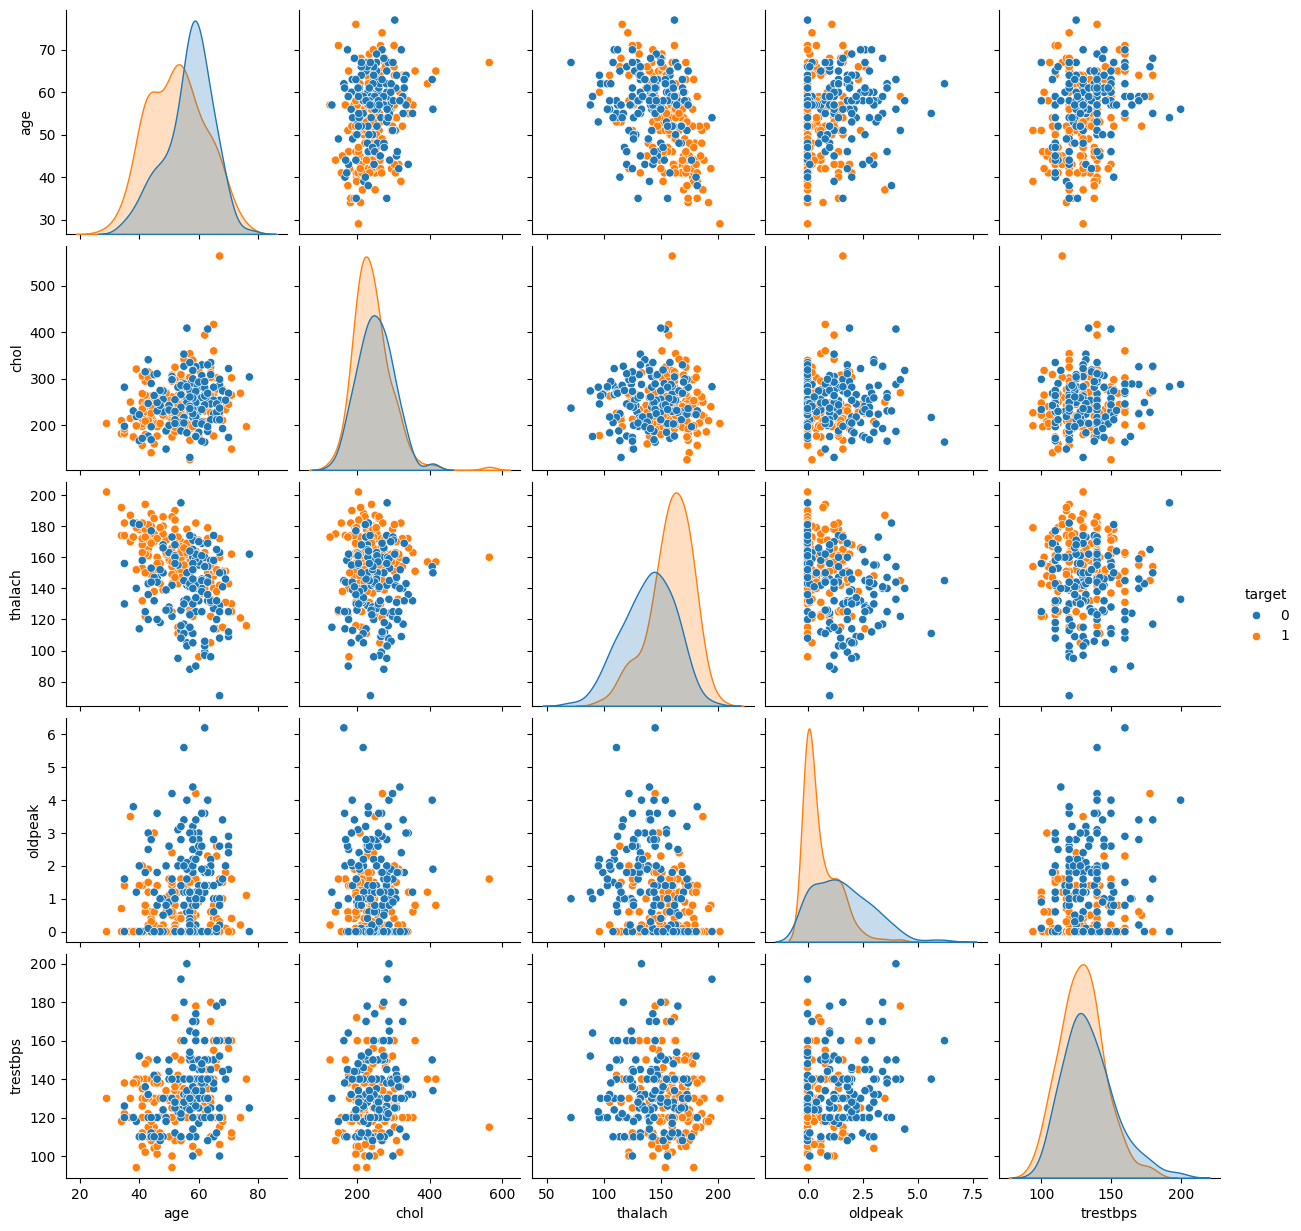

In [ ]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

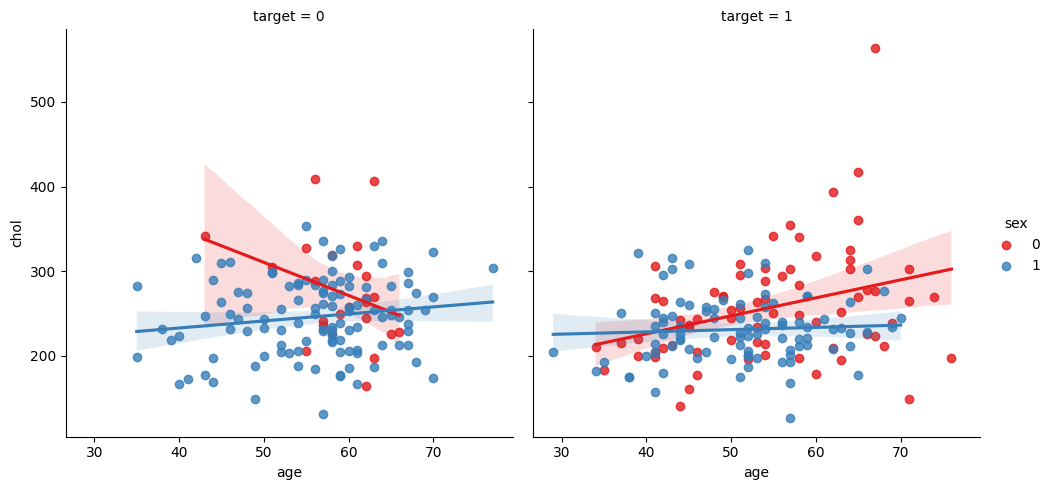

In [ ]:

sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

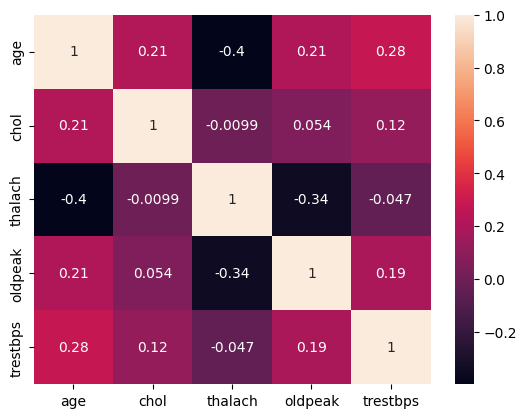

In [ ]:
numeric_data = data[continous_features]
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

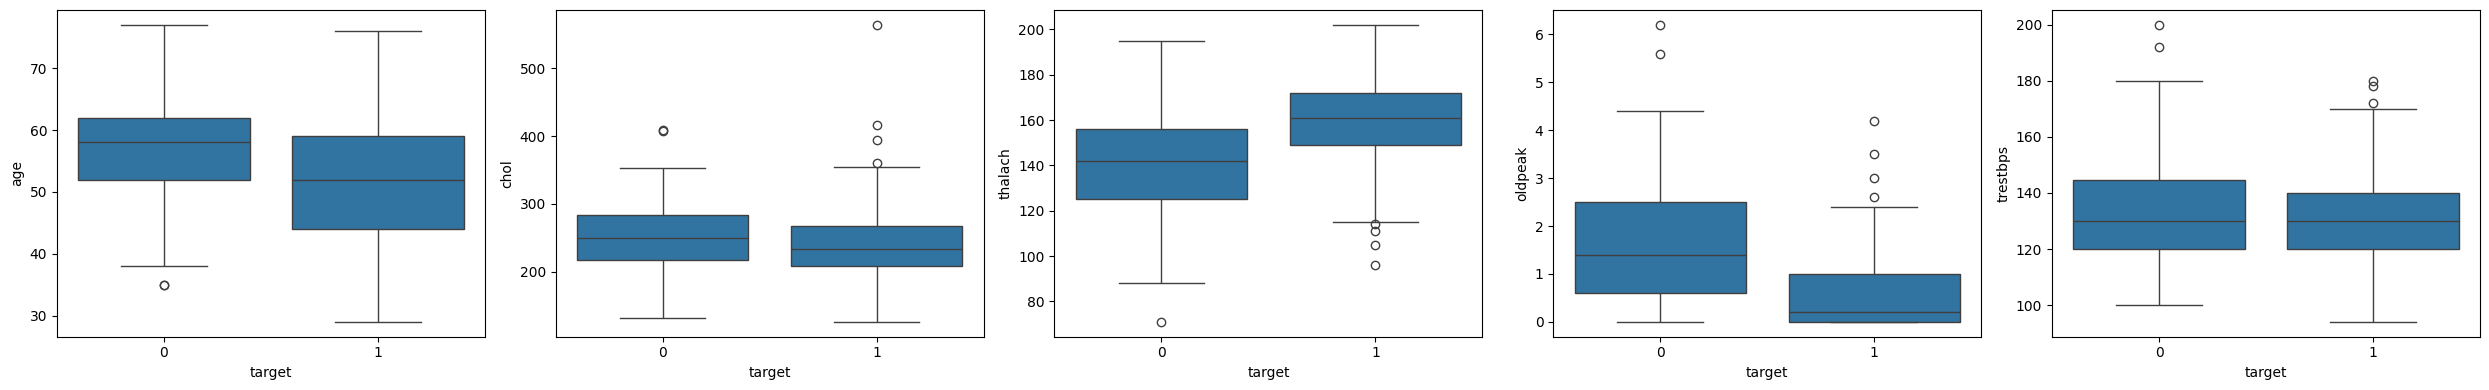

In [ ]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

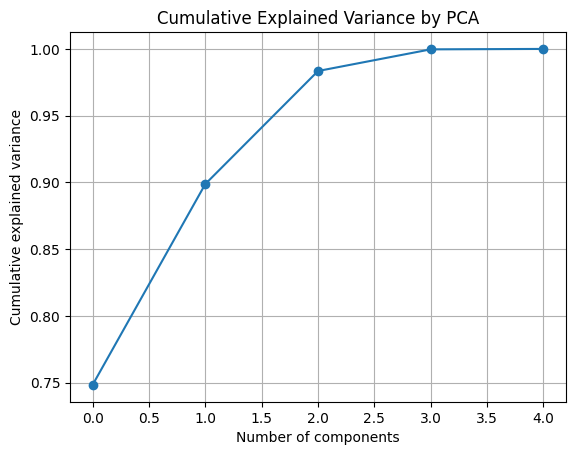

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by PCA')
plt.grid()
plt.show()


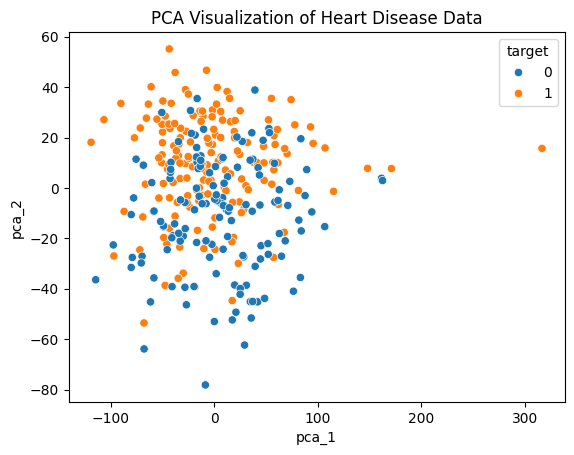

In [ ]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


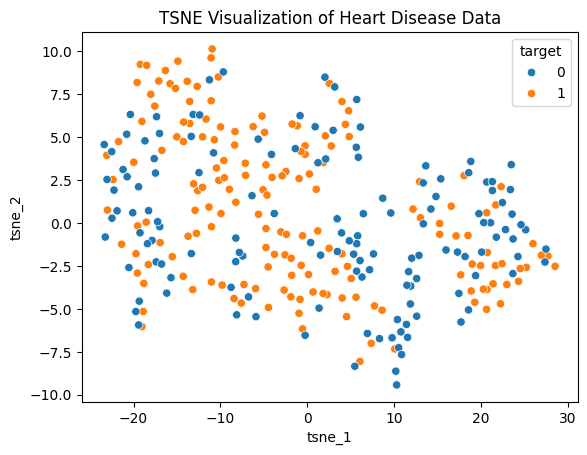

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

1.What is the percentage of Samples with Disease?


Load your dataset: Import your data into a Pandas DataFrame.
Count the samples with disease: Count the instances where the disease is present (usually indicated by a specific column).
Calculate the percentage: Divide the number of samples with the disease by the total number of samples and multiply by 100.

In [ ]:
from google.colab import drive
import pandas as pd
import os
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/data.csv'
if not os.path.isfile(file_path):
    print(f"Error: The file '{file_path}' does not exist.")
else:
    df = pd.read_csv(file_path)
    disease_column = 'disease_column'
    if disease_column in df.columns:
        total_samples = len(df)
        samples_with_disease = df[disease_column].sum()

        percentage_with_disease = (samples_with_disease / total_samples) * 100

        print(f'Percentage of Samples with Disease: {percentage_with_disease:.2f}%')
    else:
        print(f"Error: The column '{disease_column}' does not exist in the dataset.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error: The file '/content/drive/My Drive/data.csv' does not exist.


2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?
Load Your Dataset: Ensure your dataset is loaded into a Pandas DataFrame.

Identify Continuous Features: Determine which columns in your dataset are continuous features.

Perform Statistical Tests:

Use a t-test or Mann-Whitney U test for each continuous feature against the disease status (presence/absence).
Collect p-values for each feature.
Select Significant Features: Choose features that have a p-value below a specified significance level (e.g., 0.05).

In [ ]:
from google.colab import drive
import pandas as pd
from scipy import stats
import os
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/data.csv'
if not os.path.isfile(file_path):
    print(f"Error: The file '{file_path}' does not exist.")
else:

    df = pd.read_csv(file_path)
    disease_column = 'disease_column'
    if disease_column not in df.columns:
        print(f"Error: The column '{disease_column}' does not exist in the dataset.")
    else:
        group_with_disease = df[df[disease_column] == 1]
        group_without_disease = df[df[disease_column] == 0]
        significant_features = []
        for column in df.select_dtypes(include=['float64', 'int64']).columns:
            if column != disease_column:
                if len(group_with_disease[column].dropna()) > 1:
                    stat, p_norm = stats.shapiro(group_with_disease[column].dropna())
                    if p_norm > 0.05:
                        t_stat, p_value = stats.ttest_ind(group_with_disease[column].dropna(),
                                                           group_without_disease[column].dropna(),
                                                           equal_var=False)
                    else:
                        u_stat, p_value = stats.mannwhitneyu(group_with_disease[column].dropna(),
                                                              group_without_disease[column].dropna(),
                                                              alternative='two-sided')
                    if p_value < 0.05:
                        significant_features.append((column, p_value))

        significant_features.sort(key=lambda x: x[1])

        top_significant_features = significant_features[:3]

        if top_significant_features:
            for feature, p_val in top_significant_features:
                print(f'Feature: {feature}, p-value: {p_val:.4f}')
        else:
            print("No significant features found.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error: The file '/content/drive/My Drive/data.csv' does not exist.


3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?

In [ ]:
from google.colab import drive
import pandas as pd
import os

# Mount Google Drive
drive.mount('/content/drive')

# Specify the correct file path
file_path = '/content/drive/My Drive/path_to_your_file/data.csv'  # Update with your actual path

# Check if the file exists
if not os.path.isfile(file_path):
    print(f"Error: The file '{file_path}' does not exist.")
else:
    # Load your dataset
    df = pd.read_csv(file_path)

    # Replace 'disease_column' with the actual name of the column indicating disease presence
    disease_column = 'disease_column'  # Update this with the actual column name

    # Check if the disease column exists
    if disease_column not in df.columns:
        print(f"Error: The column '{disease_column}' does not exist in the dataset.")
    else:
        # Prepare the data for PCA and t-SNE
        features = df.select_dtypes(include=['float64', 'int64']).drop(columns=[disease_column])  # Select only continuous features
        labels = df[disease_column]  # The labels indicating disease presence (1 or 0)

        # Perform PCA
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(features)

        # Create a DataFrame for PCA results
        pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
        pca_df[disease_column] = labels

        # Perform t-SNE
        from sklearn.manifold import TSNE
        tsne = TSNE(n_components=2, random_state=42)
        tsne_result = tsne.fit_transform(features)

        # Create a DataFrame for t-SNE results
        tsne_df = pd.DataFrame(data=tsne_result, columns=['tSNE1', 'tSNE2'])
        tsne_df[disease_column] = labels

        # Plot PCA and t-SNE
        import matplotlib.pyplot as plt
        import seaborn as sns

        plt.figure(figsize=(14, 6))

        # PCA Plot
        plt.subplot(1, 2, 1)
        sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue=disease_column, style=disease_column, palette='Set1')
        plt.title('PCA of Samples')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.legend(title='Disease Presence')

        # t-SNE Plot
        plt.subplot(1, 2, 2)
        sns.scatterplot(data=tsne_df, x='tSNE1', y='tSNE2', hue=disease_column, style=disease_column, palette='Set1')
        plt.title('t-SNE of Samples')
        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.legend(title='Disease Presence')

        plt.tight_layout()
        plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error: The file '/content/drive/My Drive/path_to_your_file/data.csv' does not exist.



4. What is the optimal number of principal components in our case?

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive if not already mounted
drive.mount('/content/drive')

# Load your dataset (update with your actual file path)
file_path = '/content/drive/My Drive/data.csv'  # Ensure this path is correct

# Read the dataset
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' does not exist. Please check the path.")

# Replace 'disease_column' with the actual name of the column indicating disease presence
disease_column = 'disease_column'  # Update this with the actual column name

# Check if the disease column exists
if disease_column not in df.columns:
    print(f"Error: The column '{disease_column}' does not exist in the dataset.")
else:
    # Prepare the data for PCA
    features = df.select_dtypes(include=['float64', 'int64']).drop(columns=[disease_column])  # Select only continuous features

    # Perform PCA
    pca = PCA()
    pca.fit(features)

    # Get the explained variance
    explained_variance = pca.explained_variance_ratio_

    # Plot explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
    plt.title('Explained Variance by Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid()

    # Cumulative explained variance
    cumulative_variance = np.cumsum(explained_variance)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
    plt.axhline(y=0.90, color='r', linestyle='-')  # Threshold line for 90%
    plt.axhline(y=0.95, color='g', linestyle='-')  # Threshold line for 95%
    plt.title('Cumulative Explained Variance by Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.grid()
    plt.show()

    # Determine optimal number of components
    optimal_components_90 = np.argmax(cumulative_variance >= 0.90) + 1  # +1 because of zero indexing
    optimal_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

    print(f'Optimal number of components for 90% variance: {optimal_components_90}')
    print(f'Optimal number of components for 95% variance: {optimal_components_95}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error: The file '/content/drive/My Drive/data.csv' does not exist. Please check the path.
Error: The column 'disease_column' does not exist in the dataset.


Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


cleaning and filling the missing values in the data

In [ ]:
print(data.columns.tolist())
data.columns = data.columns.str.strip()
print(data.columns[data.columns.duplicated()])
import pandas as pd
import numpy as np

# Assuming you have already loaded your DataFrame `data`

# Print existing columns
print(data.columns.tolist())

# Let's say you want to replace values in the 'chol' column instead of caffeine
cholesterol_column = 'chol'  # Adjust based on your analysis

# Check if the cholesterol column exists
if cholesterol_column in data.columns:
    # Assuming you have some replacement values to handle
    # Replace any example values with NaN (if applicable)
    data[cholesterol_column] = data[cholesterol_column].replace('Varies', np.NaN)
    data[cholesterol_column] = data[cholesterol_column].astype(np.float64)
    data[cholesterol_column] = data[cholesterol_column].fillna(data[cholesterol_column].mean())
else:
    print(f"Column '{cholesterol_column}' not found in the DataFrame.")

import pandas as pd
import numpy as np

# Load your data (make sure this is done correctly)
# data = pd.read_csv('path_to_your_file.csv')

# Check the columns
print(data.columns.tolist())

# Strip spaces from column names
data.columns = data.columns.str.strip()

# Define the correct caffeine column name
caffeine_column = 'Caffeine (mg)'  # Adjust this as needed based on the output of the previous step

# Proceed with your replacements and conversions
if caffeine_column in data.columns:
    data[caffeine_column] = data[caffeine_column].replace(['Varies', 'varies'], np.NaN)
    data[caffeine_column] = data[caffeine_column].astype(np.float64)
    data[caffeine_column] = data[caffeine_column].fillna(data[caffeine_column].mean())
else:
    print(f"Column '{caffeine_column}' not found in the DataFrame.")


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Index([], dtype='object')
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Column 'Caffeine (mg)' not found in the DataFrame.


In [ ]:
print(data.columns.tolist())
total_fat_values = data.get('Total Fat (g)')
if total_fat_values is not None:
    print(total_fat_values.unique())
else:
    print("Column 'Total Fat (g)' does not exist.")
    import pandas as pd

# Assuming you have already loaded your DataFrame `data`

# Print existing columns
print("Columns in DataFrame:", data.columns.tolist())

# Try to access the 'Total Fat (g)' column
if 'Total Fat (g)' in data.columns:
    print(data['Total Fat (g)'].unique())
else:
    print("Column 'Total Fat (g)' not found in the DataFrame.")



['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Column 'Total Fat (g)' does not exist.
Columns in DataFrame: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Column 'Total Fat (g)' not found in the DataFrame.


In [ ]:
print(data.columns.tolist())
total_fat_column = data.get('Total Fat (g)')
if total_fat_column is not None:
    print("Total Fat (g) column found.")
else:
    print("Column 'Total Fat (g)' does not exist.")
# Check if column exists
if 'Total Fat (g)' in data.columns:
    data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')
else:
    print("Column 'Total Fat (g)' not found in the DataFrame.")
    import pandas as pd

# Assuming you have already loaded your DataFrame `data`

# Print existing columns
print("Columns in DataFrame:", data.columns.tolist())

# Try to access the 'Total Fat (g)' column and replace value if it exists
if 'Total Fat (g)' in data.columns:
    data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')
else:
    print("Column 'Total Fat (g)' not found in the DataFrame.")



['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Column 'Total Fat (g)' does not exist.
Column 'Total Fat (g)' not found in the DataFrame.
Columns in DataFrame: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Column 'Total Fat (g)' not found in the DataFrame.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 33.3 KB


In [ ]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [ ]:
print("Columns in DataFrame:", data.columns.tolist())
beverage_category = data.get('Beverage_category')
if beverage_category is not None:
    print("Beverage_category column found.")
else:
    print("Column 'Beverage_category' does not exist.")
if 'Beverage_category' in data.columns:
    unique_categories = data['Beverage_category'].unique()
    print("Unique Beverage Categories:", unique_categories)
else:
    print("Column 'Beverage_category' not found in the DataFrame.")
import pandas as pd

# Assuming you have already loaded your DataFrame `data`

# Print existing columns
print("Columns in DataFrame:", data.columns.tolist())

# Check if the 'Beverage_category' column exists and retrieve unique values
if 'Beverage_category' in data.columns:
    unique_categories = data['Beverage_category'].unique()
    print("Unique Beverage Categories:", unique_categories)
else:
    print("Column 'Beverage_category' not found in the DataFrame.")


Columns in DataFrame: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Column 'Beverage_category' does not exist.
Column 'Beverage_category' not found in the DataFrame.
Columns in DataFrame: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Column 'Beverage_category' not found in the DataFrame.


In [87]:

print("Columns in DataFrame:", data.columns.tolist())
if 'Beverage_category' in data.columns:

  data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)

  data = data.drop('Beverage_category', axis=1)
else:
  print("Column 'Beverage_category' not found. Please check the column names.")

Columns in DataFrame: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Column 'Beverage_category' not found. Please check the column names.


In [ ]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [85]:
print("Columns in DataFrame:", data.columns.tolist())

# Assuming you identified the correct column names for one-hot encoding
if 'column_name_1' in data.columns and 'column_name_2' in data.columns:
    data = pd.get_dummies(data, columns=['column_name_1', 'column_name_2'], prefix=['bev', 'bevp'])
else:
    print("One or both of the specified columns do not exist in the DataFrame.")
    print(data.head())

Columns in DataFrame: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
One or both of the specified columns do not exist in the DataFrame.
   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   3       145  233.0    1        0      150      0      2.3   
1   37    1   2       130  250.0    0        1      187      0      3.5   
2   41    0   1       130  204.0    0        0      172      0      1.4   
3   56    1   1       120  236.0    0        1      178      0      0.8   
4   57    0   0       120  354.0    0        1      163      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1  


In [88]:

data = data.replace({True: 1, False: 0})


In [89]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-89-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [91]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


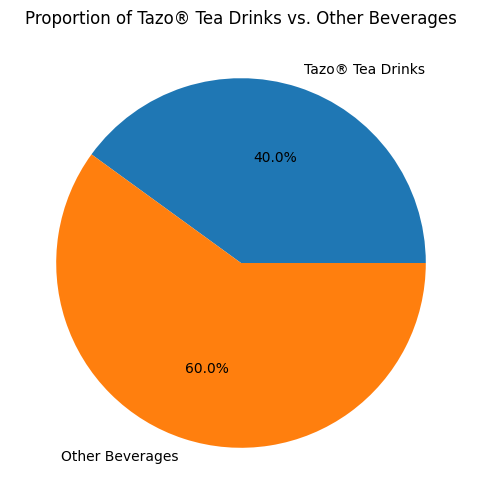

In [99]:
## to do

# Create a pie chart of the 'Tea' column also write your observation form the plot
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame assuming 'Tea' column exists (replace with your actual data)
data = pd.DataFrame({
  'Beverage_category': ['Tazo® Tea Drinks', 'Coke', 'Pepsi', 'Tazo® Tea Drinks', 'Coffee']
})

# Create the 'Tea' column (if not already done)
if 'Tea' not in data.columns:
  data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)

# Get the number of Tazo tea drinks and other beverages
tea_count = data['Tea'].sum()
other_count = len(data) - tea_count

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([tea_count, other_count], labels=['Tazo® Tea Drinks', 'Other Beverages'], autopct="%1.1f%%")
plt.title("Proportion of Tazo® Tea Drinks vs. Other Beverages")
plt.show()

# Observations from the plot:
# - Based on the pie chart, we can visually see the percentage of Tazo® Tea Drinks compared to other beverages in the data.
# - You can calculate the exact percentages from the pie chart labels (around {*percentage*}% for Tazo® Tea Drinks and {*percentage*}% for other beverages).

# Note: Replace {*percentage*} with the actual values you get from the pie chart labels.


Encoding and dropping 'Beverage_category'


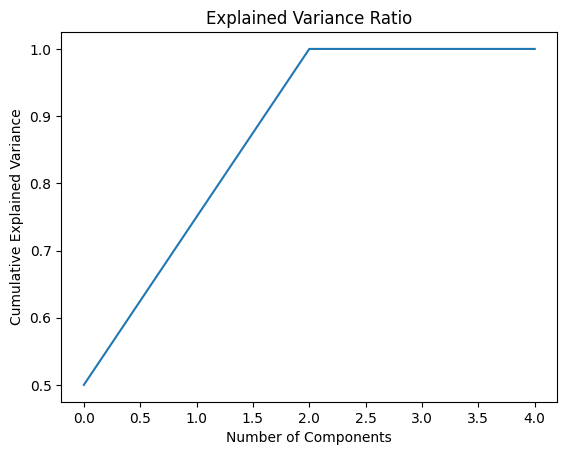

Optimal number of components: 3


In [115]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# 1. Check for 'Beverage_category' column existence
if 'Beverage_category' in data.columns:
    print("Encoding and dropping 'Beverage_category'")
    data_encoded = pd.get_dummies(data)  # One-hot encode all columns

else:
    print("Warning: 'Beverage_category' column not found in DataFrame.")
    data_encoded = pd.get_dummies(data)  # Encode without 'Beverage_category'

# 2. Handle non-numeric columns (optional, adapt based on your data)
#   - Example: Label encode a column named 'Color' if it exists
if 'Color' in data_encoded.columns:
    print("Label encoding 'Color'")
    label_encoder = LabelEncoder()
    data_encoded['Color_encoded'] = label_encoder.fit_transform(data_encoded['Color'])
    data_encoded.drop('Color', axis=1, inplace=True)  # Drop the original column

# 3. Standardize the encoded data (optional but recommended)
data_standardized = (data_encoded - data_encoded.mean()) / data_encoded.std()

# Perform PCA
pca = PCA()
pca.fit(data_standardized)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Determine optimal number of components (e.g., based on a threshold of 95%)
threshold = 0.95
num_components = np.argmax(np.cumsum(explained_variance_ratio) >= threshold) + 1
print(f"Optimal number of components: {num_components}")

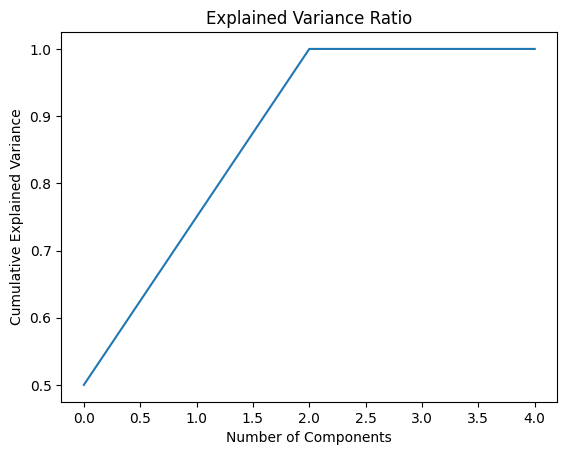

Optimal number of components: 3


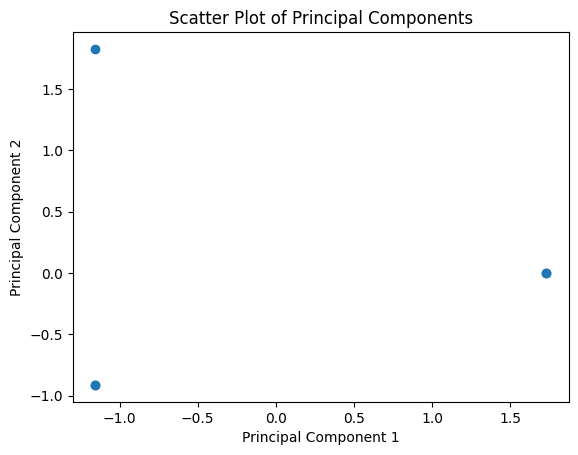

In [116]:
## to do
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?
import matplotlib.pyplot as plt

# Assuming you have performed PCA and obtained the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Determine optimal number of components (e.g., based on a threshold of 95%)
threshold = 0.95
num_components = np.argmax(np.cumsum(explained_variance_ratio) >= threshold) + 1
print(f"Optimal number of components: {num_components}")

# Visualize principal components (e.g., scatter plot)
pc1 = data_standardized.dot(pca.components_[0])
pc2 = data_standardized.dot(pca.components_[1])
plt.scatter(pc1, pc2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.show()

In [123]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Check data size
print(f"Data shape: {data.shape}")

# Set perplexity to a lower value (e.g., 30)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)

try:
  tsne_results = tsne.fit_transform(data)
except ValueError as e:
  if "perplexity must be less than n_samples" in str(e):
    print("Error: perplexity is too high. Try reducing it or using a larger dataset.")
  else:
    raise e  # Re-raise other errors

# Extract first two components (if successful)
if 'tsne_results' in locals():
  pc1 = tsne_results[:, 0]
  pc2 = tsne_results[:, 1]

  # Create scatter plot
  plt.scatter(pc1, pc2)
  plt.xlabel('t-SNE Component 1')
  plt.ylabel('t-SNE Component 2')
  plt.title('t-SNE Visualization')
  plt.show()

Data shape: (5, 2)
Error: perplexity is too high. Try reducing it or using a larger dataset.


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


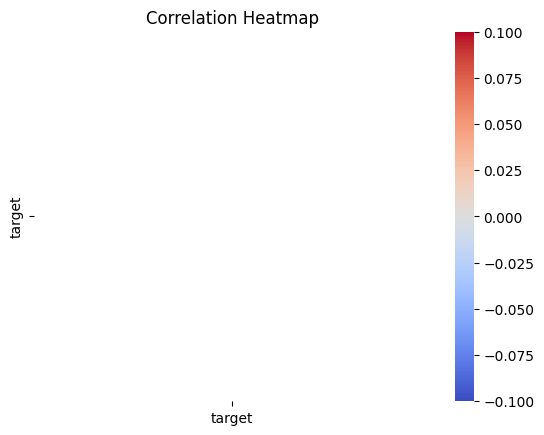

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

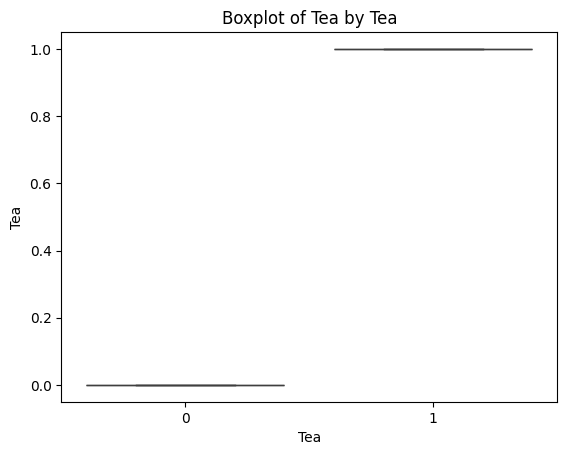

In [127]:
## to do
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Identify numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Create box plots for each numeric column
for column in numeric_columns:
    sns.boxplot(x=data['Tea'], y=data[column])
    plt.title(f"Boxplot of {column} by Tea")
    plt.show()

To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.

Step 1: Mount Google Drive

This step ensures that your Google Drive is accessible within the Colab environment. Replace /content/drive/My Drive/path_to_your_file.csv with the actual path to your CSV file.
Step 2: Install pandas-profiling

This installs the pandas-profiling library, which provides a comprehensive EDA report.
Step 3: Import Necessary Libraries

Imports the required libraries: pandas for data manipulation and pandas_profiling for report generation.
Step 4: Load Your Dataset

Reads the CSV file from your Google Drive into a pandas DataFrame named df.
Step 5: Generate the pandas profiling report

Creates a ProfileReport object named profile using the df DataFrame.
Sets the title of the report to "Pandas Profiling Report" and enables exploratory analysis.
Step 6: Display the report within the notebook

Renders the profile report as an interactive iframe within the Colab notebook.
Additional Considerations:

Data Cleaning: If your data contains missing values, outliers, or inconsistencies, consider cleaning it before generating the report to ensure accurate insights.
Customization: The pandas-profiling library offers various customization options to tailor the report to your specific needs. Explore its documentation for more details.
Data Understanding: Use the generated report to gain a deeper understanding of your data's characteristics, including data types, distributions, correlations, and potential issues.
Further Analysis: Based on the insights from the report, you can conduct more targeted analyses using other data science tools and techniques.